In [7]:
import pandas as pd
from biosppy import signals

# Read the CSV file
df_bp = pd.read_csv('BP0729.csv')

In [9]:
import biosppy
biosppy

<module 'biosppy' from '/Users/simon/anaconda3/lib/python3.10/site-packages/biosppy/__init__.py'>

In [10]:
import pandas as pd
from datetime import datetime, timezone, timedelta

# Convert timestamp into readable time
def convert_timestamps(df, column_name, tz_offset=-4):
    # Convert UNIX timestamps (including fractions) to UTC and apply the timezone offset
    df['readable_time'] = pd.to_datetime(df[column_name], unit='s', utc=True) + timedelta(hours=tz_offset)
    # Format the datetime to a readable string format including fractional seconds
    df['readable_time'] = df['readable_time'].dt.strftime('%Y-%m-%d %I:%M:%S.%f %p')

    return df


# Apply the conversion function
df_bp = df_bp.rename(columns={df_bp.columns[0]: 'timestamp'})
df_bp = convert_timestamps(df_bp, 'timestamp')


In [11]:
# Function to convert and filter timestamps based on a time range within the same day
def filter_timestamps_by_time_range(df, column_name, start_time_str, end_time_str, tz_offset=-4):
    # Convert UNIX timestamps to UTC and apply the timezone offset
    df['readable_time'] = pd.to_datetime(df[column_name], unit='s', utc=True) + timedelta(hours=tz_offset)
    
    # Extract time in 'HHMMSS' format for comparison
    df['time_str'] = df['readable_time'].dt.strftime('%H%M%S')
    print(df.head())
    # Filter based on the time range assuming the same day
    filtered_df = df[(df['time_str'] >= start_time_str) & (df['time_str'] <= end_time_str)]
    
    # Drop the extra 'time_str' column used for filtering
    filtered_df = filtered_df.drop(columns=['time_str'])
    
    return filtered_df

In [12]:
# Define the time range you want to filter
start_time_str = '152831'  # Start time in 'HHMMSS' format
end_time_str = '155830'    # End time in 'HHMMSS' format
filtered_df = filter_timestamps_by_time_range(df_bp, 'timestamp', start_time_str, end_time_str)

      timestamp  Pig BP Last (mmHg)                       readable_time  \
0  1.722274e+09             56.1522    2024-07-29 13:28:06.192000+00:00   
1  1.722274e+09             54.3689 2024-07-29 13:28:06.193000192+00:00   
2  1.722274e+09             52.5856 2024-07-29 13:28:06.194000128+00:00   
3  1.722274e+09             54.3689 2024-07-29 13:28:06.194999808+00:00   
4  1.722274e+09             52.5856    2024-07-29 13:28:06.196000+00:00   

  time_str  
0   132806  
1   132806  
2   132806  
3   132806  
4   132806  


In [ ]:
filtered_df

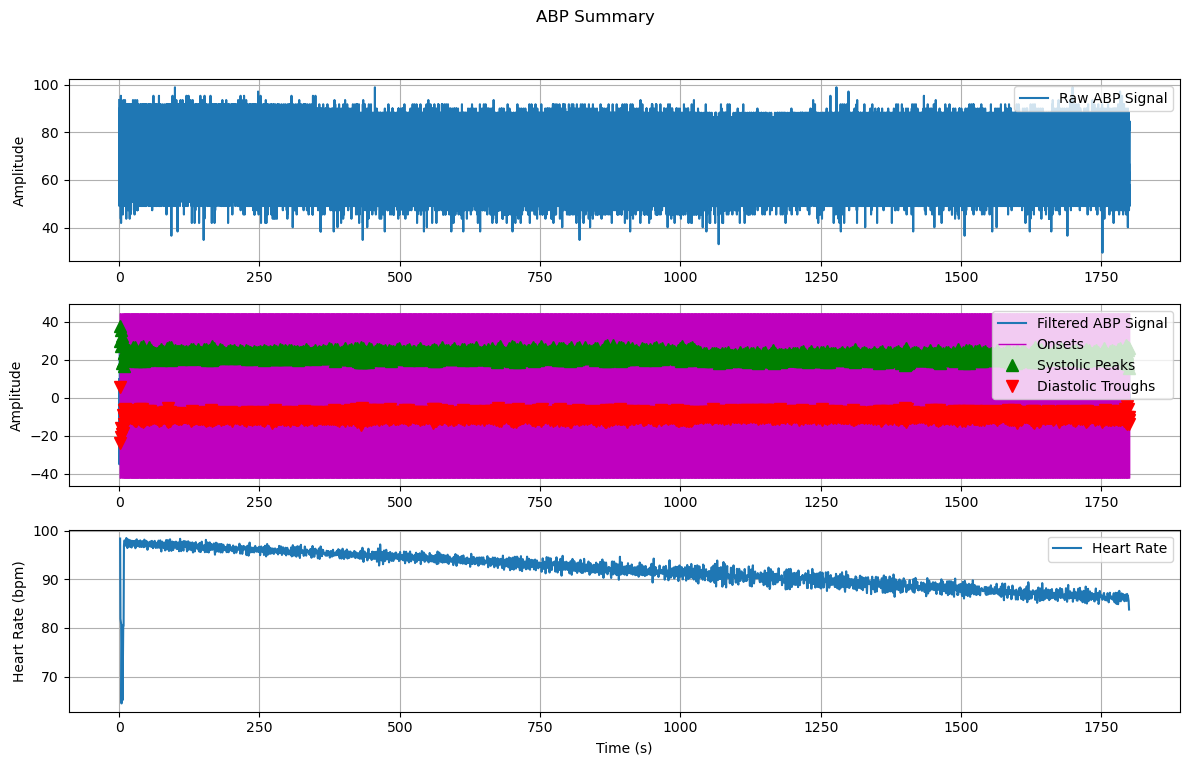

In [13]:
# Process the ABP signal
signal_data = filtered_df.iloc[:, 1].values  # Assuming the second column contains the signal
out = signals.abp.abp(signal=signal_data, sampling_rate=1000, show=True) # sampling rate needs to be adjusted based on the actual data

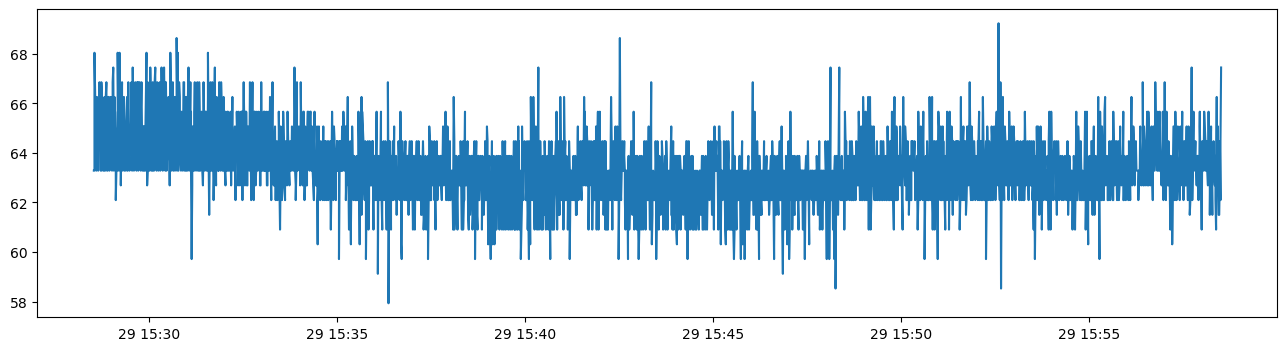

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
start_time = filtered_df['timestamp'].iloc[0]
t = [datetime.fromtimestamp(start_time + i) for i in out['ts'][out['diastolic_troughs']].astype(int)]
# t = [time.strftime('%H:%M') for time in t]
plt.plot(t, out['mean_arterial_pressure'])
# plt.ylim(53,67)
# plt.plot(out['diastolic_pressure'])
# plt.plot(out['systolic_pressure'])
# plt.legend(['Mean Arterial Pressure', 'Diastolic Pressure', 'Systolic Pressure'])